# 定义简单的全连接神经网络

In [39]:
#!pip install scipy

## 定义神经网络

### 神经网络

In [5]:
import numpy
import scipy.special

class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # 输入层
        self.input_nodes = input_nodes
        # 隐藏层
        self.hidden_nodes = hidden_nodes
        # 输出层
        self.output_nodes = output_nodes        
        
        # 激活函数
        self.activation_function = lambda x: scipy.special.expit(x)

        # 学习率
        self.learning_rate = learning_rate
        
        # 要训练的权重矩阵：输入-隐层
        self.w_input_hidden = numpy.random.normal(
            0.0,
            pow(self.hidden_nodes, -0.5),
            (self.hidden_nodes, self.input_nodes)
        )

        # 要训练的权重矩阵：隐层-输出
        self.w_hidden_output = numpy.random.normal(
            0.0,
            pow(self.output_nodes, -0.5),
            (self.output_nodes, self.hidden_nodes)
        )

    def train(self, inputs_list, targets_list):
        """
        单个批次训练
        """

        # 输入数据和结果标签
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # 隐藏层的输入、输出
        hidden_inputs = numpy.dot(self.w_input_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        # 结果层的输入、输出
        final_inputs = numpy.dot(self.w_hidden_output, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        # 传递误差
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.w_hidden_output.T, output_errors)

        # 更新隐藏层的权重
        self.w_hidden_output += self.learning_rate * numpy.dot(
            output_errors * final_outputs * (1.0 - final_outputs),
            numpy.transpose(hidden_outputs)
        )

        # 更新输入层的权重
        self.w_input_hidden += self.learning_rate * numpy.dot(
            hidden_errors * hidden_outputs * (1.0 - hidden_outputs),
            numpy.transpose(inputs)
        )

    def predict(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T

        hidden_inputs = numpy.dot(self.w_input_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = numpy.dot(self.w_hidden_output, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

## 数据集

### 从本地加载数据

In [80]:
data_file = open("../data/mnist_train_100.csv", "r")
data_list = data_file.readlines()
data_file.close()

In [81]:
#!pip install matplotlib

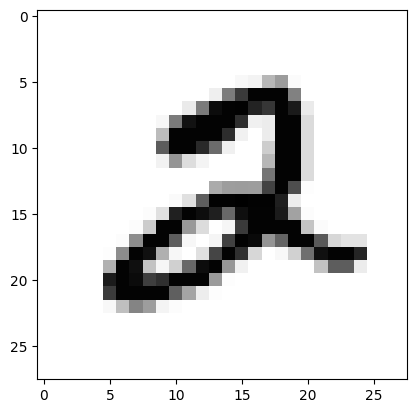

In [82]:
import numpy
import matplotlib.pyplot
%matplotlib inline

all_values = data_list[5].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

## 训练（使用 MINI 数据）

### 从 numpy 处理数据，并训练

In [36]:
n = NeuralNetwork(input_nodes=784, hidden_nodes=200, output_nodes=10, learning_rate=0.2)

training_data_file = open("../data/mnist_train_100.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

for epoch in range(5):
    print("-"*20, "epoch", epoch, "-"*20)
    for record in training_data_list:
        all_values = record.split(',')

        # 输入
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        # 目标值
        targets = numpy.zeros(10) + 0.01
        targets[int(all_values[0])] = 0.99

        print(targets)
        n.train(inputs, targets)

-------------------- epoch 0 --------------------
[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]
[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]
[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99]
[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01]
[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]
[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01]
[0.01 0.01 0.0

### 从 DataLoader 处理数据，并训练

In [55]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class MyDataset(Dataset):
    def __init__(self, file_path):
        self.data = []
        with open(file_path, "r") as file:
            for line in file:
                all_values = line.split(',')
                inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
                targets = np.zeros(10) + 0.01
                targets[int(all_values[0])] = 0.99
                self.data.append((inputs, targets))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# 创建 Dataset 对象
dataset = MyDataset("../data/mnist_train_100.csv")

# 创建 DataLoader 对象
BATCH_SIZE = 5
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# 定义神经网络
n = NeuralNetwork(input_nodes=784, hidden_nodes=200, output_nodes=10, learning_rate=0.2)

# 使用 DataLoader 对象来获取数据
for epoch in range(5):
    for batch, (inputs, labels) in enumerate(data_loader):
        for i in range(len(inputs)):
            n.train(inputs[i], labels[i])


### 从torchvision下载MNIST数据，并训练

In [76]:
from torch.utils.data import Subset
from torchvision import datasets
from torchvision.transforms import Lambda
import numpy as np

# 定义自定义的 transform 函数
def custom_transform(x):
    # 输入
    inputs = (np.asfarray(x) / 255.0 * 0.99) + 0.01
    return inputs

# 定义自定义的 target_transform 函数
def custom_target_transform(y):
    # 目标值
    targets = np.zeros(10) + 0.01
    targets[int(y)] = 0.99
    return targets

# 自动下载MNIST数据集，使用自定义的 transform 函数
dataset_train = datasets.MNIST('data', train=True, download=True,
                                transform=Lambda(custom_transform),
                                target_transform=Lambda(custom_target_transform))
dataset_test = datasets.MNIST('data', train=False,
                                transform=Lambda(custom_transform),
                                target_transform=Lambda(custom_target_transform))

# 定义数据加载器（自动对数据加载、多线程、随机化、划分batch、等等）
train_loader = torch.utils.data.DataLoader(Subset(dataset_train, range(100)), batch_size=5)
test_loader = torch.utils.data.DataLoader(Subset(dataset_test, range(10)), batch_size=5)

# 定义神经网络
n = NeuralNetwork(input_nodes=784, hidden_nodes=200, output_nodes=10, learning_rate=0.2)

# 使用 DataLoader 对象来获取数据
# for epoch, d in enumerate(range(5)):
    # print("epoch")
for batch, (inputs, labels) in enumerate(train_loader):
    for i in range(len(labels)):
        # print(inputs[i].view(-1))
        # 改变输入数据的形状
        n.train(inputs[i].view(-1), labels[i])

### 测试（使用 MINI 数据）

In [77]:
test_data_file = open("../data/mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

score_card = []

for record in test_data_list:
    all_values = record.split(",")
    correct_label = int(all_values[0])
    print("-"*20)
    print(correct_label, "correct_lable")
    
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.predict(inputs)
    label = numpy.argmax(outputs)
    print(label, "predict answer")
    
    if label == correct_label:
        score_card.append(1)
    else:
        score_card.append(0)

print(score_card)

--------------------
7 correct_lable
7 predict answer
--------------------
2 correct_lable
2 predict answer
--------------------
1 correct_lable
1 predict answer
--------------------
0 correct_lable
0 predict answer
--------------------
4 correct_lable
4 predict answer
--------------------
1 correct_lable
1 predict answer
--------------------
4 correct_lable
4 predict answer
--------------------
9 correct_lable
3 predict answer
--------------------
5 correct_lable
1 predict answer
--------------------
9 correct_lable
7 predict answer
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


## 训练（使用完整数据）

In [102]:
n = NeuralNetwork(input_nodes=784, hidden_nodes=200, output_nodes=10, learning_rate=0.1, epochs=5)

training_data_file = open("../data/large_data/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

for record in training_data_list:
    all_values = record.split(',')

    # 输入
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # 目标值
    targets = numpy.zeros(10) + 0.01
    targets[int(all_values[0])] = 0.99
    
    n.train(inputs, targets)

## 测试（使用完整数据）

In [98]:

test_data_file = open("../data/large_data/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [101]:
score_card = []

for record in test_data_list:
    all_values = record.split(",")
    correct_label = int(all_values[0])
    # print("-"*20)
    # print(correct_label, "correct_lable")
    
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    # print(label, "predict answer")
    
    if label == correct_label:
        score_card.append(1)
    else:
        score_card.append(0)

print(score_card[:20])
score_card_array = numpy.asarray(score_card)
print("performance = ", score_card_array.sum() / score_card_array.size)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
performance =  0.9465
